In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

In [178]:
j = 15
k = 10

features = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_features.csv')
pct = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_pct.csv')

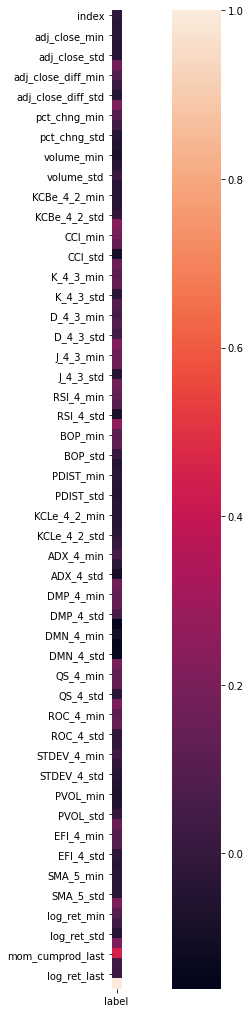

In [179]:
corr = features.corr() 
fig, ax = plt.subplots(figsize = (18, 18)) 
sns.heatmap(corr[['label']], square=True) 

In [180]:
correlated_features = set()
for i in range(len(corr.columns)):
    for a in range(i):
        if abs(corr.iloc[i, a]) > 0.90:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [181]:
num_colums = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(features.select_dtypes(include=num_colums).columns)
df = features[numerical_columns]
df

,index,adj_close_mean,adj_close_min,adj_close_max,adj_close_std,adj_close_diff_mean,adj_close_diff_min,adj_close_diff_max,adj_close_diff_std,pct_chng_mean,...,SMA_5_std,log_ret_mean,log_ret_min,log_ret_max,log_ret_std,cumprod_last,mom_cumprod_last,rev_cumprod_last,log_ret_last,label
0,0,1123.195205,1084.530029,1150.229980,24.561236,-2.019165,-24.719971,14.199951,9.295283,-0.001716,...,20.648782,-0.001749,-0.022390,0.012422,0.008118,-0.042772,0.233062,-0.207040,0.000000,1.0
1,1,1079.340979,1063.109985,1103.319946,15.805292,-0.853339,-34.170044,15.319946,14.323768,-0.000648,...,6.293092,-0.000718,-0.031636,0.014165,0.012477,-0.007152,-0.088180,-0.098000,0.000000,0.0
2,2,1079.487000,1056.739990,1099.510010,16.786922,4.752224,-2.959961,19.359985,7.940117,0.003998,...,10.432011,0.003968,-0.002748,0.017841,0.007087,0.040474,0.053083,0.083438,0.000000,0.0
3,3,1103.768321,1094.599976,1109.170044,4.669185,-0.205455,-13.410034,10.640015,5.544996,-0.000160,...,1.633490,-0.000170,-0.012177,0.009674,0.004802,-0.002042,0.026533,-0.024911,0.000000,1.0
4,4,1131.107983,1115.709961,1140.449951,10.635107,2.748888,-0.199951,15.729980,5.095707,0.002204,...,7.008268,0.002193,-0.000176,0.013910,0.004319,0.022174,0.072531,0.096534,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,401,3807.556030,3768.250000,3851.850098,25.679233,5.804443,-27.290039,52.940186,23.627389,0.001382,...,5.686095,0.001366,-0.007216,0.013839,0.005870,0.013749,0.045478,0.024797,0.000000,1.0
402,402,3800.582520,3714.239990,3855.360107,56.578891,-12.620916,-98.850098,36.609863,38.819262,-0.003009,...,38.186568,-0.003058,-0.026013,0.009713,0.009832,-0.036031,-0.071222,-0.178839,0.000000,0.0
403,403,3872.938037,3773.860107,3915.590088,48.048667,15.263319,-4.360107,52.449951,20.829984,0.003594,...,30.022002,0.003575,-0.001114,0.013803,0.005280,0.036400,0.088030,0.094960,0.000000,0.0
404,404,3920.014160,3906.709961,3934.830078,11.432022,-0.288175,-17.360107,18.450195,8.616452,-0.000066,...,5.047401,-0.000068,-0.004426,0.004700,0.002094,-0.000811,0.001232,0.044315,0.000000,0.0


In [182]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), 
                                                    df['label'], train_size=0.538,shuffle=False)
X_before = X_test
X_train = X_train.dropna()
X_test = X_test.dropna()

X_train.drop(columns=correlated_features, axis=1, inplace=True)
X_test.drop(columns=correlated_features, axis=1, inplace=True)


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

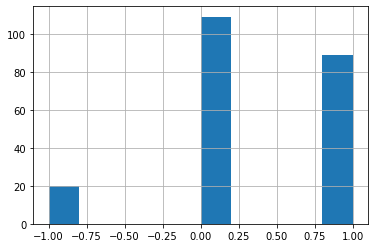

In [183]:
y_train.hist()

In [184]:
mlp = MLPClassifier(max_iter=500)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,verbose=True)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   22.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],


In [185]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [186]:
predictions = clf.predict(X_test)
predictions

array([ 0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0., -1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1., -1.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
       -1.,  1.,  1., -1.,  0.,  0., -1.,  0.,  1., -1.,  0.,  1., -1.,
        0.,  1.,  1.,  0.,  1., -1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  1.,
        0.,  1., -1.,  0., -1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -1.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  1.,  0

In [187]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        -1.0       0.50      0.43      0.47        23
         0.0       0.63      0.71      0.67        87
         1.0       0.75      0.67      0.71        78

    accuracy                           0.66       188
   macro avg       0.63      0.60      0.61       188
weighted avg       0.66      0.66      0.66       188



In [188]:
X_before['label'] = predictions.tolist()

In [189]:
performance =pct[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']].infer_objects()
performance['date'] = pd.to_datetime(performance['date'])
# output = date.merge(performance, how='right',left_index=True, right_index=True)[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']]
# output
# output.to_csv(csv_)
performance = performance.set_index('date')
performance = performance.merge(X_before[['label']], left_on='index', right_index=True) #example
performance['test_pct_change'] = performance.apply(lambda x: x['mom_pct_change'] if x['label']==1 else x['rev_pct_change'] if x['label']==-1 else 0,axis=1) # todo build more models and get their outputs. output results here

performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: (x+1).cumprod()-1)*100
#performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: np.log(1 + x).cumsum())
performance
performance[['mom_return_diff','rev_return_diff', 'test_return_diff']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].diff()
performance['mom_sharpe_ratio'] = performance['mom_return'].mean()/performance['mom_return'].std() * np.sqrt(252)

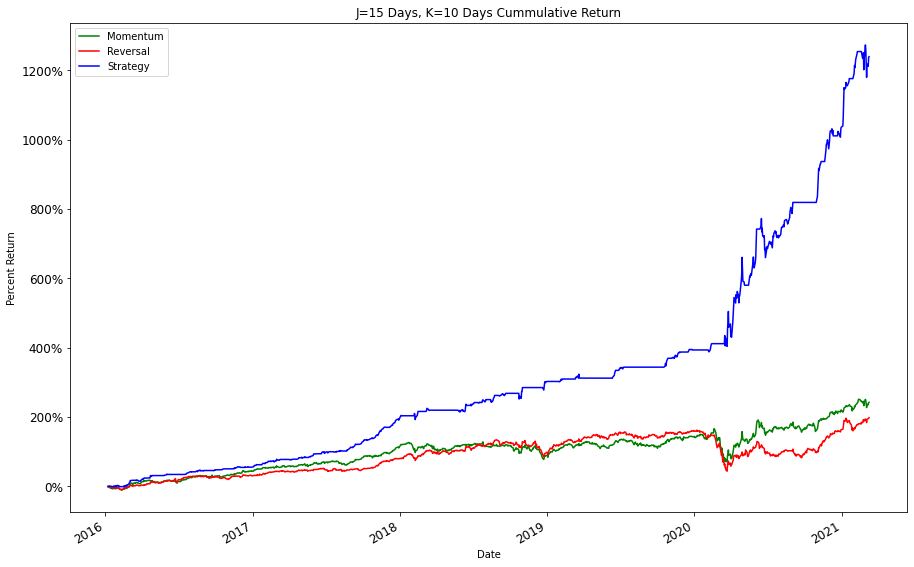

In [190]:
import matplotlib.ticker as mtick

plt = performance[['mom_return','rev_return', 'test_return']].plot(figsize=(15,10),title='J={0} Days, K={1} Days Cummulative Return'.format(j,k),xlabel="Date",ylabel="Percent Return",fontsize=12,color=['green','red','blue'])
plt.legend(['Momentum','Reversal','Strategy'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
plt.yaxis.set_major_formatter(yticks)
plt.get_figure().savefig('mlp_performance_j{0}_k{1}.png'.format(j,k))